## Neural Network Notebook ##

A first draft of the neural network that will be used for the ECG classification project is described in this notebook.

### Initialization ###

We will train our model  with the help of the TensorFlow framework. If you had not installed TensorFlow yet, you can do it easily with the command pip install --upgrade tensorflow.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras


### Part 1 : importing the data ###

We start by importing our tests data. 

NOTE : training and testing datas can be in the same directory, we can seperate them directly with tensorflow.

NOTE2 : 
What is batch size ? 
Batch size is the number of samples you put into for each training round.
So for each epoch, you can split your training sets into multiple batches.
For example, I have 1000 images.
If I set my batch size to 1, then for each epoch (training round), my input into the network will be 1 x 1000 images.
If set my batch size to 2, then it will be 2 x 500 images.
Meaning, for each epoch, I will run two rounds, each round using 500 images.
Step is just the learning rate that you use for your optimizer.
Usually, we start with 0.001 or 0.01.

NOTE3 : Augmentation method

Found 99199 files belonging to 6 classes.
Found 24799 files belonging to 6 classes.


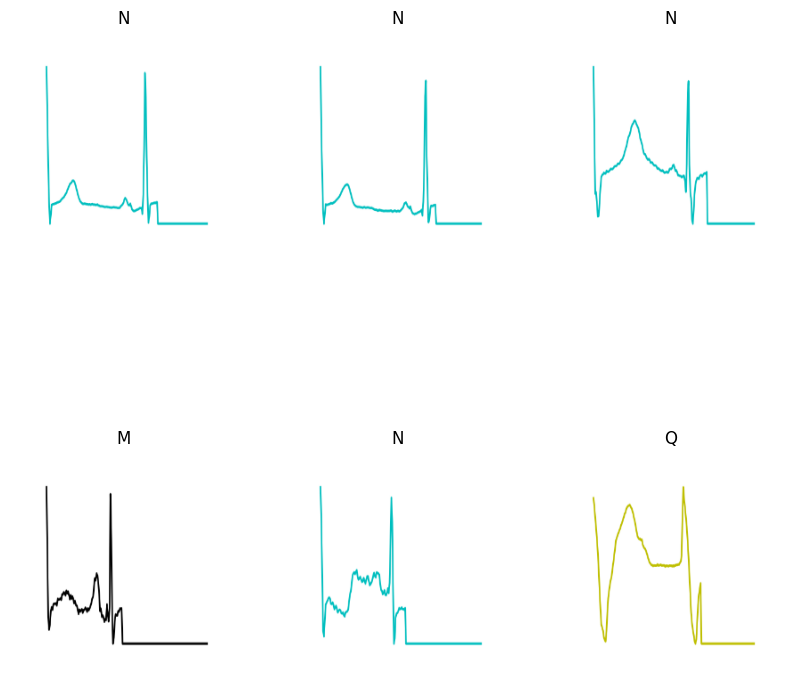

In [28]:
batch_size=1

traindata=tf.keras.utils.image_dataset_from_directory("ECG_Image_data/train",labels='inferred',class_names=["F","M","N","Q","S","V"])
valdata=tf.keras.utils.image_dataset_from_directory("ECG_Image_data/test",labels='inferred',class_names=["F","M","N","Q","S","V"])

plt.figure(figsize=(10, 10))
for images, labels in traindata.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(traindata.class_names[labels[i]])
    plt.axis("off")


In [29]:
for image_batch, labels_batch in traindata: 
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


image_bacth shape (32,256,256,3) means a group of 32 images of size 256x256 and the last channel 3 corresponds to the RVB colors reference. 
labels_batch shape (32,) corresponds to the label of the 32 images. 

NOTE : Why 32 ???

### Part 2 : pre-processing the data ###

#### Data standardization ###

For now, RVB channels are in [0,255] which is too large for a neural network. We will then normalize these values. 

NOTE : use only one channel for black and white pictures : search code to convert to black and white.

NOTE 2 :  Rescaling the image can be directly implemented in the model by layer.Rescaling

In [30]:
normalization_layer= tf.keras.layers.Rescaling(1./255)

normtraindata=traindata.map(lambda x, y: (normalization_layer(x),y))

### Part 3 :  creating the model ###

In this part, we define important elements that will be used to build our model. 

NOTE : This model is the one used in the Image Classification tutorial from TensorFlow website, same for the compiler. NEED TO BE RETHINKED AND DISCUSSED. 

In [31]:
# Model Creation

model= keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'), 
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(6)
])

model.build((None,256,256,3))

#Model Compiler
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Model summary 
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 64)      

### Part 3 : training and testing ###

Note : This code is taken from the TensorFlow tutorial page. 

Epoch 1/20
3100/3100 [==============================] - 2607s 840ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
3100/3100 [==============================] - 2580s 832ms/step - loss: 6.4749e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
3100/3100 [==============================] - 2580s 832ms/step - loss: 1.7307e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
3100/3100 [==============================] - 2586s 834ms/step - loss: 2.6053e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
3100/3100 [==============================] - 2625s 847ms/step - loss: 9.8060e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
3100/3100 [==============================] - 2596s 837ms/step - loss: 4.1940e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
3100/3100 [==============================] - 2579s 

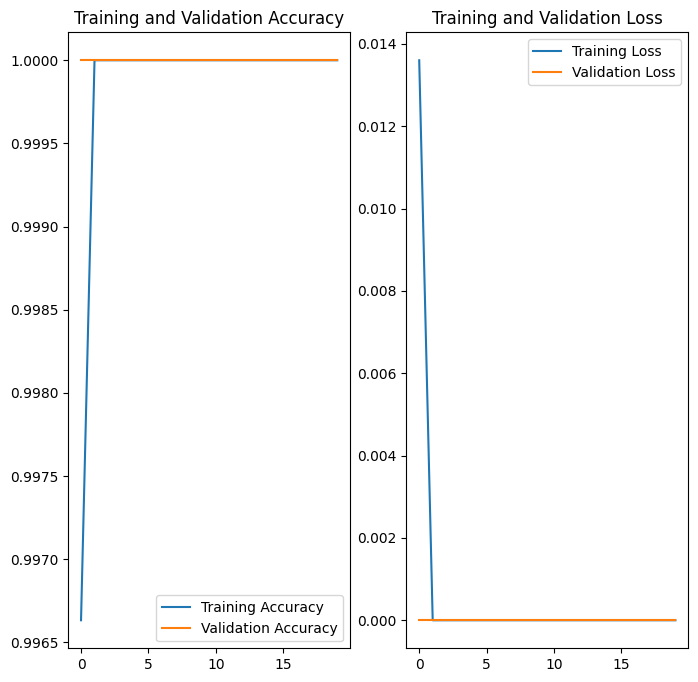

In [32]:
epochs= 20
history = model.fit(
  normtraindata,
  validation_data=valdata,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

model.save('model/model_20E_fulldata.h5')

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



### Part 4 : Testing a random image on the model ###

Very simple code to quickly test some predictions on our model. Has to be improved. 

In [33]:
predata=tf.keras.utils.image_dataset_from_directory("S_prediction_datas_labels")

dict={0:"F",1:"M",2:"N",3:"N",4:"Q",5:"S",6:"V"}
prediction = model.predict(predata) 

classes = np.argmax(prediction, axis = 1)

for i,clas in enumerate(classes) :
    print(f"Image {i} is disease "+dict[clas] ) 
    




Found 6 files belonging to 6 classes.
1/1 [==============================] - 0s 356ms/step
Image 0 is disease F
Image 1 is disease Q
Image 2 is disease N
Image 3 is disease S
Image 4 is disease M
Image 5 is disease N
